In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

#tree regression
from sklearn.ensemble import RandomForestRegressor

# imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv('../dataset/long_beach_level_encoded_numeric_value_nov_28.csv')
df.head()

,simplified_color,simplified_sex,intake_age,simplified_condition,simplified_type,days_stayed,simplified_color_encoded,simplified_sex_encoded,simplified_condition_encoded,simplified_type_encoded
0,OTHER,FEMALE,8,NORMAL,OWNER SURRENDER,94,2,0,3,1
1,OTHER,FEMALE,8,NORMAL,OWNER SURRENDER,17,2,0,3,1
2,BLACK,FEMALE,3,OTHER,OWNER SURRENDER,32,0,0,4,1
3,OTHER,MALE,8,NORMAL,OWNER SURRENDER,48,2,1,3,1
4,GRAY,MALE,1,NORMAL,STRAY,8,1,1,3,2


## We are predicting if a cat will stay more than a month in the shelter (yes = 1, no =0) ☟

In [3]:
(df['days_stayed']>30).sum()

1411

In [4]:
(df['days_stayed']<30).sum()

1126

In [5]:
# this part is to predict long or short stay (0,1)
import pandas as pd

def categorize_stay(days_stayed):
    if days_stayed <= 30:
        return 0
    else:
        return 1

# Example usage:
# Assuming df is your DataFrame and "days_stayed" is the column you want to categorize
df['stay'] = df['days_stayed'].apply(categorize_stay)
df.tail()

,simplified_color,simplified_sex,intake_age,simplified_condition,simplified_type,days_stayed,simplified_color_encoded,simplified_sex_encoded,simplified_condition_encoded,simplified_type_encoded,stay
2563,OTHER,MALE,0,ILL MILD,STRAY,73,2,1,0,2,1
2564,TABBY,MALE,0,OTHER,STRAY,67,3,1,4,2,1
2565,TABBY,FEMALE,5,INJURED,STRAY,68,3,0,2,2,1
2566,OTHER,FEMALE,0,UNDER WEIGHT,STRAY,84,2,0,5,2,1
2567,BLACK,MALE,0,UNDER WEIGHT,STRAY,73,0,1,5,2,1


In [6]:
df.head()

,simplified_color,simplified_sex,intake_age,simplified_condition,simplified_type,days_stayed,simplified_color_encoded,simplified_sex_encoded,simplified_condition_encoded,simplified_type_encoded,stay
0,OTHER,FEMALE,8,NORMAL,OWNER SURRENDER,94,2,0,3,1,1
1,OTHER,FEMALE,8,NORMAL,OWNER SURRENDER,17,2,0,3,1,0
2,BLACK,FEMALE,3,OTHER,OWNER SURRENDER,32,0,0,4,1,1
3,OTHER,MALE,8,NORMAL,OWNER SURRENDER,48,2,1,3,1,1
4,GRAY,MALE,1,NORMAL,STRAY,8,1,1,3,2,0


In [7]:
count_ones = df['stay'].value_counts().get(1)
print(f"Number of occurrences of 1: {count_ones}")

count_zeros = df['stay'].value_counts().get(0)
print(f"Number of occurrences of 0: {count_zeros}")


Number of occurrences of 1: 1411
Number of occurrences of 0: 1157


In [8]:
# independent_variables = ['simplified_color_encoded', 'simplified_sex_encoded',  
#                      'simplified_condition_encoded', 'simplified_type_encoded', 'intake_age']

# dependent_variable = 'stay'

In [9]:
independent_variables = ['simplified_color_encoded', 'simplified_condition_encoded', 'intake_age']

dependent_variable = 'stay'

In [10]:
df[independent_variables]

,simplified_color_encoded,simplified_condition_encoded,intake_age
0,2,3,8
1,2,3,8
2,0,4,3
3,2,3,8
4,1,3,1
...,...,...,...
2563,2,0,0
2564,3,4,0
2565,3,2,5
2566,2,5,0


In [11]:
X= df[independent_variables]
y= df[dependent_variable]
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) 
X_train.shape, X_test.shape

# # Use imbalanced-learn to resample the training data
# ros = RandomUnderSampler(sampling_strategy='auto', random_state=42)  # we can adjust the sampling_strategy as needed
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


((1797, 3), (771, 3))

In [12]:
(y_test==1).sum()

425

In [13]:
(y_test==0).sum()

346

In [14]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='accuracy',
    cv=5, 
    verbose=1
)

# 1. Fit your GridSearchCV with your training data. 
# grid_search_cv.fit(X_resampled, y_resampled)

grid_search_cv.fit(X_train, y_train)

# Print the best parameters it found
print(grid_search_cv.best_estimator_) 

good_model = grid_search_cv.best_estimator_


# ----------------------- Now lets evaluate our model------------
y_pred = good_model.predict(X_test)


accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred= y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred= y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred= y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = good_model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
RandomForestClassifier(max_depth=10, max_leaf_nodes=10, min_samples_split=10,
                       n_estimators=50)
Accuracy Score: 0.596628
Precision Score: 0.593443
Recall Score: 0.851765
F1 Score: 0.699517
AUC Score: 0.615328


In [15]:
feature_importance = pd.Series(good_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

simplified_color_encoded        0.351960
simplified_condition_encoded    0.349329
intake_age                      0.298711
dtype: float64


In [16]:
ratio = (y_test == 1).sum() / ((y_test == 0) | (y_test == 1)).sum()
ratio

0.5512321660181583

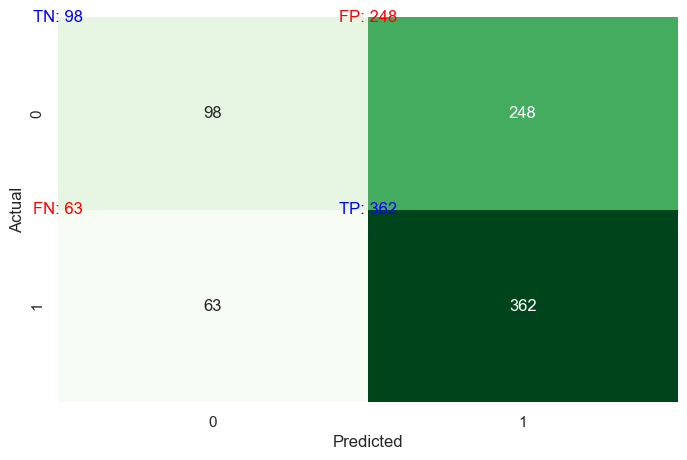

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

# Extract individual elements from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False, ax=ax)

# Label the heatmap with TN, FP, FN, and TP values
ax.text(0, 0, f'TN: {tn}', ha='center', va='center', color='blue', fontsize=12)
ax.text(1, 0, f'FP: {fp}', ha='center', va='center', color='red', fontsize=12)
ax.text(0, 1, f'FN: {fn}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 1, f'TP: {tp}', ha='center', va='center', color='blue', fontsize=12)

# Set labels for x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()


# ⬆︎⬆︎-----------  F1 Score: 0.703488 -------- ⬆︎⬆︎ (best so far)

In [18]:
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# from sklearn.preprocessing import StandardScaler
# from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

# # Define independent and dependent variables
# independent_variables = ['simplified_color_encoded', 'simplified_condition_encoded', 'intake_age']
# dependent_variable = 'stay'

# # Extract features and target variable
# X = df[independent_variables]
# y = df[dependent_variable]

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# # Feature Scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Define hyperparameter grid for GridSearchCV
# params = { 
#     'n_estimators': [50, 100, 150],
#     'max_features': ['sqrt', 'log2', None],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'max_leaf_nodes': [5, 10],
#     'class_weight': ['balanced', None]  # Added class_weight to the parameters
# }

# # Perform GridSearchCV
# grid_search_cv = GridSearchCV(
#     estimator=RandomForestClassifier(),
#     param_grid=params,
#     scoring='accuracy',
#     cv=5, 
#     verbose=1
# )

# # Fit the model and print the best parameters
# grid_search_cv.fit(X_train_scaled, y_train)
# print(grid_search_cv.best_estimator_)
# good_model = grid_search_cv.best_estimator_

# # Make predictions on the test set
# y_pred = good_model.predict(X_test_scaled)

# # Adjust classification threshold
# threshold = 0.4  # Adjust based on your needs
# y_pred_proba = good_model.predict_proba(X_test_scaled)[:, 1]
# y_pred_adjusted = (y_pred_proba > threshold).astype(int)

# # Evaluate the model
# accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_adjusted)
# precision = precision_score(y_true=y_test, y_pred=y_pred_adjusted)
# recall = recall_score(y_true=y_test, y_pred=y_pred_adjusted)
# f1 = f1_score(y_true=y_test, y_pred=y_pred_adjusted)
# auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)

# # Print the evaluation metrics
# print("Accuracy Score: %f" % accuracy)
# print("Precision Score: %f" % precision)
# print("Recall Score: %f" % recall)
# print("F1 Score: %f" % f1)
# print("AUC Score: %f" % auc)

# # Display the adjusted confusion matrix
# confusion_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_adjusted)
# print("Confusion Matrix:")
# print(confusion_mat)

# # Experiment with BaggingClassifier
# bagging_model = BaggingClassifier(base_estimator=good_model, n_estimators=10, random_state=42)
# bagging_scores = cross_val_score(bagging_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
# print("Bagging Classifier Cross-Validation Scores:", bagging_scores)

# # Experiment with AdaBoostClassifier
# adaboost_model = AdaBoostClassifier(base_estimator=good_model, n_estimators=50, random_state=42)
# adaboost_scores = cross_val_score(adaboost_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
# print("AdaBoost Classifier Cross-Validation Scores:", adaboost_scores)


In [19]:
# from sklearn.metrics import confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming y_test and y_pred are already defined

# # Compute confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# cm = cm.round(2)

# # Extract individual elements from the confusion matrix
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# # Create a figure and axis
# fig, ax = plt.subplots(figsize=(8, 5))

# # Plot the heatmap
# sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False, ax=ax)

# # Label the heatmap with TN, FP, FN, and TP values
# ax.text(0, 0, f'TN: {tn}', ha='center', va='center', color='blue', fontsize=12)
# ax.text(1, 0, f'FP: {fp}', ha='center', va='center', color='red', fontsize=12)
# ax.text(0, 1, f'FN: {fn}', ha='center', va='center', color='red', fontsize=12)
# ax.text(1, 1, f'TP: {tp}', ha='center', va='center', color='blue', fontsize=12)

# # Set labels for x and y axes
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

# # Display the plot
# plt.show()


## in order to solve the imbalance in calss we use the below code ☟

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Load your dataset
df2 = pd.read_csv('../dataset/long_beach_level_encoded_numeric_value_nov_28.csv')

# Define the function to categorize stay
def categorize_stay(days_stayed):
    if days_stayed <= 30:
        return 0
    else:
        return 1

# Apply the categorization
df2['stay'] = df2['days_stayed'].apply(categorize_stay)

independent_variables = ['simplified_color_encoded', 'simplified_condition_encoded', 'intake_age']

dependent_variable = 'stay'

X = df2[independent_variables]
y = df2['stay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

# Use imbalanced-learn to resample the training data
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)  # You can adjust the sampling_strategy as needed
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# # Alternatively, you can use RandomUnderSampler for undersampling
# rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Define the hyperparameter grid for GridSearchCV
params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}

# Use GridSearchCV with RandomForestClassifier
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='accuracy',
    cv=5, 
    verbose=1
)

# Fit the model on the resampled data
grid_search_cv.fit(X_resampled, y_resampled)

# Print the best parameters it found
print(grid_search_cv.best_estimator_) 

# Extract the best model from GridSearchCV
use_model = grid_search_cv.best_estimator_

# Evaluate the model on the original test set
y_pred = use_model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = use_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

from joblib import dump
dump(use_model, 'use_model.joblib')


Fitting 5 folds for each of 162 candidates, totalling 810 fits
RandomForestClassifier(max_features='log2', max_leaf_nodes=5,
                       min_samples_split=10)
Accuracy Score: 0.595016
Precision Score: 0.665529
Recall Score: 0.546218
F1 Score: 0.600000
AUC Score: 0.620399


['use_model.joblib']

In [21]:
feature_importance = pd.Series(use_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

simplified_condition_encoded    0.461240
simplified_color_encoded        0.324194
intake_age                      0.214565
dtype: float64


In [22]:
ratio = (y_test == 1).sum() / ((y_test == 0) | (y_test == 1)).sum()
ratio

0.5560747663551402

In [23]:
(y_test == 1).sum()

357

In [24]:
(y_test == 0).sum()

285

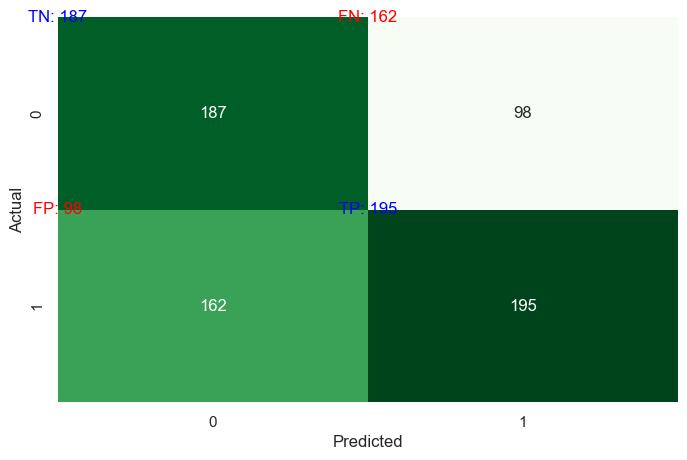

In [25]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

# Extract individual elements from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False, ax=ax)

# Label the heatmap with TN, FP, FN, and TP values
ax.text(0, 0, f'TN: {tn}', ha='center', va='center', color='blue', fontsize=12)
ax.text(0, 1, f'FP: {fp}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 0, f'FN: {fn}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 1, f'TP: {tp}', ha='center', va='center', color='blue', fontsize=12)

# Set labels for x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()


# ⬆︎⬆︎-------  F1 Score: 0.627907 ------- ⬆︎⬆︎

# Using get dummies encoded dataset

In [26]:
df2 = pd.read_csv('../dataset/long_beach_get_dummies_encoded_value_nov_29.csv')
df2.head()

,intake_age,days_stayed,simplified_color_gray,simplified_color_other,simplified_color_tabby,simplified_color_white,simplified_sex_male,simplified_condition_injured,simplified_condition_normal,simplified_condition_other,simplified_condition_under_weight,simplified_type_owner_surrender,simplified_type_stray
0,8,94,0,1,0,0,0,0,1,0,0,1,0
1,8,17,0,1,0,0,0,0,1,0,0,1,0
2,3,32,0,0,0,0,0,0,0,1,0,1,0
3,8,48,0,1,0,0,1,0,1,0,0,1,0
4,1,8,1,0,0,0,1,0,1,0,0,0,1


## We are predicting if a cat will stay more than a month in the shelter (yes = 1, no =0) ☟

In [27]:
(df2['days_stayed']>30).sum()

1248

In [28]:
(df2['days_stayed']<30).sum()

1126

In [29]:
# this part is to predict long or short stay (0,1)
import pandas as pd

def categorize_stay(days_stayed):
    if days_stayed <= 30:
        return 0
    else:
        return 1

# Example usage:
# Assuming df is your DataFrame and "days_stayed" is the column you want to categorize
df2['stay'] = df2['days_stayed'].apply(categorize_stay)
df2.tail()

,intake_age,days_stayed,simplified_color_gray,simplified_color_other,simplified_color_tabby,simplified_color_white,simplified_sex_male,simplified_condition_injured,simplified_condition_normal,simplified_condition_other,simplified_condition_under_weight,simplified_type_owner_surrender,simplified_type_stray,stay
2400,0,73,0,1,0,0,1,0,0,0,0,0,1,1
2401,0,67,0,0,1,0,1,0,0,1,0,0,1,1
2402,5,68,0,0,1,0,0,1,0,0,0,0,1,1
2403,0,84,0,1,0,0,0,0,0,0,1,0,1,1
2404,0,73,0,0,0,0,1,0,0,0,1,0,1,1


In [30]:
df2.head()

,intake_age,days_stayed,simplified_color_gray,simplified_color_other,simplified_color_tabby,simplified_color_white,simplified_sex_male,simplified_condition_injured,simplified_condition_normal,simplified_condition_other,simplified_condition_under_weight,simplified_type_owner_surrender,simplified_type_stray,stay
0,8,94,0,1,0,0,0,0,1,0,0,1,0,1
1,8,17,0,1,0,0,0,0,1,0,0,1,0,0
2,3,32,0,0,0,0,0,0,0,1,0,1,0,1
3,8,48,0,1,0,0,1,0,1,0,0,1,0,1
4,1,8,1,0,0,0,1,0,1,0,0,0,1,0


In [31]:
count_ones = df2['stay'].value_counts().get(1)
print(f"Number of occurrences of 1: {count_ones}")

count_zeros = df2['stay'].value_counts().get(0)
print(f"Number of occurrences of 0: {count_zeros}")


Number of occurrences of 1: 1248
Number of occurrences of 0: 1157


In [32]:
# independent_variables = ['simplified_color_encoded', 'simplified_sex_encoded',  
#                      'simplified_condition_encoded', 'simplified_type_encoded', 'intake_age']

# dependent_variable = 'stay'

In [33]:
independent_variables = ['simplified_color_gray', 'simplified_color_other', 'simplified_color_tabby', 'simplified_color_white', 'simplified_condition_injured', 'simplified_condition_normal', 'simplified_condition_other', 'simplified_condition_under_weight', 'intake_age']
dependent_variable = 'stay'

In [34]:
# independent_variables = ['simplified_color_encoded', 'simplified_condition_encoded', 'intake_age']

# dependent_variable = 'stay'

In [35]:
df2[independent_variables]

,simplified_color_gray,simplified_color_other,simplified_color_tabby,simplified_color_white,simplified_condition_injured,simplified_condition_normal,simplified_condition_other,simplified_condition_under_weight,intake_age
0,0,1,0,0,0,1,0,0,8
1,0,1,0,0,0,1,0,0,8
2,0,0,0,0,0,0,1,0,3
3,0,1,0,0,0,1,0,0,8
4,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
2400,0,1,0,0,0,0,0,0,0
2401,0,0,1,0,0,0,1,0,0
2402,0,0,1,0,1,0,0,0,5
2403,0,1,0,0,0,0,0,1,0


In [36]:
X= df2[independent_variables]
y= df2[dependent_variable]
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 
X_train.shape, X_test.shape

# # Use imbalanced-learn to resample the training data
# ros = RandomUnderSampler(sampling_strategy='auto', random_state=42)  # we can adjust the sampling_strategy as needed
# X_resampled, y_resampled = ros.fit_resample(X_train, y_train)


((1803, 9), (602, 9))

## 

In [37]:
(y_test==1).sum()

290

In [38]:
(y_test==0).sum()

312

In [39]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='accuracy',
    cv=5, 
    verbose=1
)

# 1. Fit your GridSearchCV with your training data. 
# grid_search_cv.fit(X_resampled, y_resampled)

grid_search_cv.fit(X_train, y_train)

# Print the best parameters it found
print(grid_search_cv.best_estimator_) 

good_model = grid_search_cv.best_estimator_


# ----------------------- Now lets evaluate our model------------
y_pred = good_model.predict(X_test)


accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred= y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred= y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred= y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = good_model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
RandomForestClassifier(max_depth=10, max_leaf_nodes=10)
Accuracy Score: 0.543189
Precision Score: 0.518160
Recall Score: 0.737931
F1 Score: 0.608819
AUC Score: 0.549889


In [40]:
feature_importance = pd.Series(good_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

simplified_condition_normal          0.278210
intake_age                           0.248163
simplified_condition_under_weight    0.169285
simplified_color_other               0.094592
simplified_color_gray                0.057497
simplified_color_white               0.045857
simplified_color_tabby               0.039186
simplified_condition_injured         0.038567
simplified_condition_other           0.028644
dtype: float64


In [41]:
ratio = (y_test == 1).sum() / ((y_test == 0) | (y_test == 1)).sum()
ratio

0.48172757475083056

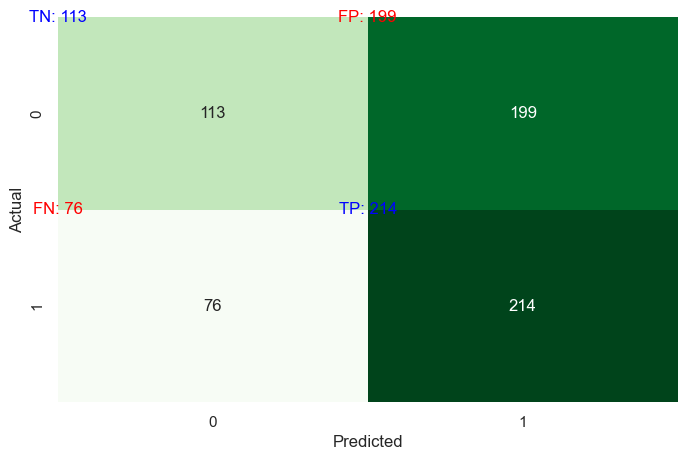

In [42]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

# Extract individual elements from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False, ax=ax)

# Label the heatmap with TN, FP, FN, and TP values
ax.text(0, 0, f'TN: {tn}', ha='center', va='center', color='blue', fontsize=12)
ax.text(1, 0, f'FP: {fp}', ha='center', va='center', color='red', fontsize=12)
ax.text(0, 1, f'FN: {fn}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 1, f'TP: {tp}', ha='center', va='center', color='blue', fontsize=12)

# Set labels for x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()


# ⬆︎⬆︎-----------  F1 Score: 0.703488 -------- ⬆︎⬆︎ 

## in order to solve the imbalance in calss we use the below code ☟

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Load your dataset
df2 = pd.read_csv('../dataset/long_beach_get_dummies_encoded_value_nov_29.csv')


# Define the function to categorize stay
def categorize_stay(days_stayed):
    if days_stayed <= 30:
        return 0
    else:
        return 1

# Apply the categorization
df2['stay'] = df2['days_stayed'].apply(categorize_stay)

independent_variables = ['simplified_color_gray', 'simplified_color_other', 'simplified_color_tabby', 'simplified_color_white', 'simplified_condition_injured', 'simplified_condition_normal', 'simplified_condition_other', 'simplified_condition_under_weight', 'intake_age']

dependent_variable = 'stay'

X = df2[independent_variables]
y = df2['stay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Use imbalanced-learn to resample the training data
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)  # You can adjust the sampling_strategy as needed
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# # Alternatively, you can use RandomUnderSampler for undersampling
# rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Define the hyperparameter grid for GridSearchCV
params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}

# Use GridSearchCV with RandomForestClassifier
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='accuracy',
    cv=5, 
    verbose=1
)

# Fit the model on the resampled data
grid_search_cv.fit(X_resampled, y_resampled)

# Print the best parameters it found
print(grid_search_cv.best_estimator_) 

# Extract the best model from GridSearchCV
use_model = grid_search_cv.best_estimator_

# Evaluate the model on the original test set
y_pred = use_model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = use_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

from joblib import dump
dump(use_model, 'model.joblib')


Fitting 5 folds for each of 162 candidates, totalling 810 fits
RandomForestClassifier(max_depth=5, max_features='log2', max_leaf_nodes=10,
                       min_samples_split=10, n_estimators=50)
Accuracy Score: 0.513514
Precision Score: 0.480176
Recall Score: 0.484444
F1 Score: 0.482301
AUC Score: 0.536623


['model.joblib']

In [44]:
feature_importance = pd.Series(use_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

simplified_condition_normal          0.292544
intake_age                           0.255107
simplified_color_other               0.134609
simplified_condition_under_weight    0.106051
simplified_color_gray                0.057969
simplified_condition_injured         0.042760
simplified_color_white               0.041101
simplified_color_tabby               0.039995
simplified_condition_other           0.029865
dtype: float64


In [45]:
ratio = (y_test == 1).sum() / ((y_test == 0) | (y_test == 1)).sum()
ratio

0.4677754677754678

In [46]:
(y_test == 1).sum()

225

In [47]:
(y_test == 0).sum()

256

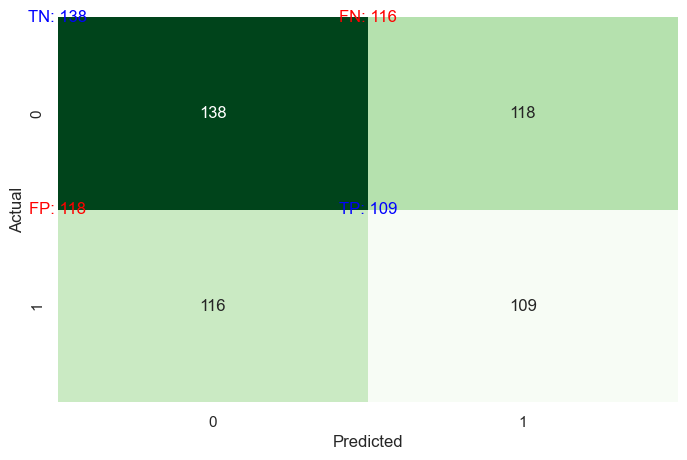

In [48]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

# Extract individual elements from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False, ax=ax)

# Label the heatmap with TN, FP, FN, and TP values
ax.text(0, 0, f'TN: {tn}', ha='center', va='center', color='blue', fontsize=12)
ax.text(0, 1, f'FP: {fp}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 0, f'FN: {fn}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 1, f'TP: {tp}', ha='center', va='center', color='blue', fontsize=12)

# Set labels for x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()


# ⬆︎⬆︎-------  F1 Score: 0.627907 ------- ⬆︎⬆︎

In [49]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

### Now we will try to predict how many month a cat will stay using regression ☟

In [ ]:
df_month = pd.read_csv('../dataset/long_beach_level_encoded_numeric_value_nov_26.csv')
df_month.head()

In [ ]:
# this part is to predict month stay
import pandas as pd

def categorize_days(days_stayed):
    if days_stayed <= 400:
        return np.ceil((days_stayed-15 )/30).astype(int)
    
# def categorize_days(days_stayed):
#     if days_stayed <= 15:
#         return 0
#     elif days_stayed <= 45:
#         return 1
#     elif days_stayed <= 75:
#         return 2
#     elif days_stayed <= 105:
#         return 3
#     # Add more conditions as needed up to 1200 days
#     elif days_stayed <= 1200:
#         # Calculate the month based on the provided conditions
#         return (days_stayed - 105) // 30 + 3
#     else:
#         # Handle cases beyond 1200 days if needed
#         return 100  # or any other value to indicate an outlier

# Example usage:
# Assuming df is your DataFrame and "days_stayed" is the column you want to categorize
df_month['months_stayed'] = df_month['days_stayed'].apply(categorize_days)
df_month.head()


In [ ]:
selected_features = ['simplified_color_encoded', 'simplified_condition_encoded', 'age']

# dependent_variable = 'days_stayed'
X= df_month[selected_features]
y= df_month['months_stayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

# Using RandomOverSampler to handle imbalanced data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}

# Initialize your GridSearchCV with a RandomForestRegressor, your param_grid, and what you are optimizing for (MSE).
grid_search_cv = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=params,
    scoring='neg_mean_squared_error',  # For regression, use neg_mean_squared_error as the scoring metric.
    cv=5, 
    verbose=1
)

# Fit your GridSearchCV with your training data.
grid_search_cv.fit(X_resampled, y_resampled)

# Get the best estimator based on the mean squared error.
best_model = grid_search_cv.best_estimator_


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  # Import r2_score

# # Map 'class' to binary labels (0 for <=50K and 1 for >50K)
# y_binary = (y == ' >50K').astype(int)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the Decision Tree classifier
# model = RandomForestRegressor(random_state=42)

# Fit the model
best_model.fit(X_resampled, y_resampled)

# Make predictions

y_pred = np.round(best_model.predict(X_test))

# Specify the positive label

# Evaluate the model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("Mean Squared Error: %f" % mse)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)


## Eval Model 
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

In [ ]:
len(y_pred)
# max(y_pred)

In [ ]:
y_pred

In [ ]:
# y_pred_series is our Pandas Series
y_pred_series = pd.Series(y_pred)

# Count occurrences of each unique value
value_counts = y_pred_series.value_counts()

# Sort the values based on unique values
sorted_value_counts = value_counts.sort_index()

# Display the sorted result
print("Sorted Value Counts:")
print(sorted_value_counts)


In [ ]:
len(y_test)

In [ ]:

# y_test_series is our Pandas Series
y_test_series = pd.Series(y_test)

# Count occurrences of each unique value
value_counts = y_test_series.value_counts()

# Sort the values based on unique values
sorted_value_counts = value_counts.sort_index()

# Display the sorted result
print("Sorted Value Counts:")
print(sorted_value_counts)


In [ ]:
print(y_test.tolist())


# ⬆︎----(over sampling) Accuracy Score: 0.036101, R2: -2.728426 ----- ⬆︎

# Trying with Randomclassifier

In [ ]:
df_month_class = pd.read_csv('../dataset/long_beach_level_encoded_numeric_value_nov_26.csv')
df_month_class.head()

In [ ]:
# this part is to predict month stay
import pandas as pd

def categorize_days(days_stayed):
    if days_stayed <= 300:
        return np.ceil((days_stayed-15 )/30).astype(int)
    else:
        # Handle cases beyond 1200 days if needed
        return 99  # or any other value to indicate an outlier

# Example usage:
# Assuming df is your DataFrame and "days_stayed" is the column you want to categorize
df_month_class['months_stayed'] = df_month_class['days_stayed'].apply(categorize_days)
df_month_class.head()


In [ ]:
# counting each groups frequency
grouped_data = df_month_class['months_stayed'].value_counts().sort_index()
grouped_data.columns = ['months_stayed', 'Count']
print(grouped_data)

In [ ]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight

In [ ]:
selected_features = ['simplified_color_encoded', 'simplified_condition_encoded', 'age']

# dependent_variable = 'days_stayed'
X= df_month_class[selected_features]
y= df_month_class['months_stayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using RandomOverSampler to handle imbalanced data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_train.shape, X_test.shape

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}

# Initialize your GridSearchCV with a RandomForestRegressor, your param_grid, and what you are optimizing for (MSE).
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='neg_mean_squared_error',  # For regression, use neg_mean_squared_error as the scoring metric.
    cv=5, 
    verbose=1
)

# Fit your GridSearchCV with your training data.
grid_search_cv.fit(X_resampled, y_resampled)

# Get the best estimator based on the mean squared error.
best_model = grid_search_cv.best_estimator_


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score  # Import r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
best_model.fit(X_resampled, y_resampled)

# Make predictions

y_pred = best_model.predict(X_test)

# Calculate precision, recall, and F1 score

precision = precision_score(y_true=y_test, y_pred=y_pred, average='weighted')  # Adjust average if needed
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred, average='weighted')  # Adjust average if needed
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')  # Adjust average if needed
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]


In [ ]:
# y_pred_series is our Pandas Series
y_pred_series = pd.Series(y_pred)

# Count occurrences of each unique value
value_counts = y_pred_series.value_counts()

# Sort the values based on unique values
sorted_value_counts = value_counts.sort_index()

# Display the sorted result
print("Sorted Value Counts:")
print(sorted_value_counts)


In [ ]:
# y_pred_series is our Pandas Series
y_test_series = pd.Series(y_test)

# Count occurrences of each unique value
value_counts = y_test_series.value_counts()

# Sort the values based on unique values
sorted_value_counts = value_counts.sort_index()

# Display the sorted result
print("Sorted Value Counts:")
print(sorted_value_counts)


# --------- F1 Score: 0.013658 ------------

# 2nd approch (all code together) RandomForestRegression

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
# Load the dataset
df_month_short = pd.read_csv('../dataset/long_beach_level_encoded_numeric_value_nov_26.csv')

# Define a function to categorize days
def categorize_days(days_stayed):
    if days_stayed <= 300:
        return np.ceil((days_stayed - 15) / 30).astype(int)
    else:
        return 99  # or any other value to indicate an outlier

# Apply the categorization to create a new column 'months_stayed'
df_month_short['months_stayed'] = df_month_short['days_stayed'].apply(categorize_days)

# Define selected features
selected_features = ['simplified_color_encoded',  
                     'simplified_condition_encoded', 'age']

# Set up X and y
X = df_month_short[selected_features]
y = df_month_short['months_stayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using RandomUnderSampler
rus = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Define the parameter grid for GridSearchCV
params = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize GridSearchCV
grid_search_cv = GridSearchCV(
    estimator=rf_classifier,
    param_grid=params,
    scoring='f1_weighted',  # Use F1 score for classification and consider class imbalance
    cv=5,
    verbose=1
)

# Fit GridSearchCV with resampled training data
grid_search_cv.fit(X_resampled, y_resampled)

# Get the best estimator based on F1 score
best_model = grid_search_cv.best_estimator_

# Fit the best model with the original training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
print("Accuracy Score: %f" % accuracy)
print("F1 Score: %f" % f1)

In [ ]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

In [ ]:
len(y_pred)
# max(y_pred)

In [ ]:
# Create a DataFrame with residuals
residuals_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred, 'Residuals': residuals})

# Sort the DataFrame by residuals in ascending order
residuals_df_sorted = residuals_df.sort_values(by='Residuals', ascending=True)

# Display the sorted DataFrame
print("Sorted by Residuals (Ascending):")
print(residuals_df_sorted.head(50))

# Sort the DataFrame by residuals in descending order
residuals_df_sorted_desc = residuals_df.sort_values(by='Residuals', ascending=False)

# Display the sorted DataFrame
print("Sorted by Residuals (Descending):")
print(residuals_df_sorted_desc.head(50))

In [ ]:
print(residuals_df_sorted_desc[residuals_df_sorted_desc['Residuals']==0].head(50))

In [ ]:
# Plot histogram of residuals
plt.hist(residuals_df['Residuals'], bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [ ]:
# y_pred_series is our Pandas Series
y_pred_series = pd.Series(y_pred)

# Count occurrences of each unique value
value_counts = y_pred_series.value_counts()

# Sort the values based on unique values
sorted_value_counts = value_counts.sort_index()

# Display the sorted result
print("Sorted Value Counts:")
print(sorted_value_counts)


In [ ]:
len(y_test)

In [ ]:

# y_test_series is our Pandas Series
y_test_series = pd.Series(y_test)

# Count occurrences of each unique value
value_counts = y_test_series.value_counts()

# Sort the values based on unique values
sorted_value_counts = value_counts.sort_index()

# Display the sorted result
print("Sorted Value Counts:")
print(sorted_value_counts)


# ⬆︎⬆︎---------(Over sampling) F1 Score: 0.129868 -----⬆︎⬆︎